Introduction

To know which factor may affect the student's performance, we classify the score inot couple of ranks, and figure out which featureaffect the score more significant. The indpendent varibles are as followed:

1. Gender
2. Race/ethnicity 
3. Parental level of education
4. Lunch
5. Test preparation course

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans

Let's see how many datasets in this topic

In [9]:
os.listdir(".")

['exam.csv',
 '03_numpy.ipynb',
 '01_notebook.ipynb',
 '06_kernel.ipynb',
 'Untitled.ipynb',
 '04_magic.ipynb',
 '05_config.ipynb',
 'exam_results.csv',
 '.ipynb_checkpoints',
 '02_pandas.ipynb']

Only one! Take a look at the dataset

In [10]:
filename = "exam_results.csv"
score_df = pd.read_csv(filename)
score_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Some column names are too long, rename the column names to be simplier

In [12]:
score_df.rename(columns = {"race/ethnicity":"ethnicity", "parental level of education": "parent_education", "math score":"math", "reading score":"reading","writing score":"writing","test preparation course":"pre"}, inplace=True)
score_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
score_df.groupby("gender")[list(score_df.columns[-3:])[0]].mean()

gender
female    63.633205
male      68.728216
Name: math, dtype: float64

In [17]:
score_df.groupby("gender")[list(score_df.columns[-3:])[1]].mean()

gender
female    72.608108
male      65.473029
Name: reading, dtype: float64

In [18]:
score_df.groupby("gender")[list(score_df.columns[-3:])[2]].mean()

gender
female    72.467181
male      63.311203
Name: writing, dtype: float64

Seems clearly. Check the data types

In [13]:
score_df.dtypes

gender              object
ethnicity           object
parent_education    object
lunch               object
pre                 object
math                 int64
reading              int64
writing              int64
dtype: object

Plotting the average scores per gender. Use a barplot

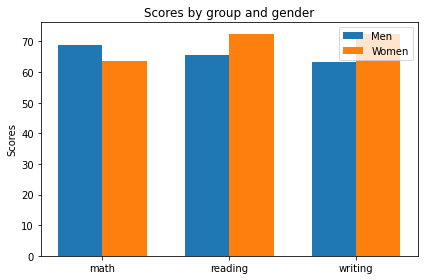

In [22]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['math', 'reading', 'writing']
men_means = [68.7, 65.5, 63.3]
women_means = [63.6, 72.6, 72.5]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [33]:
score_df.groupby("lunch")[list(score_df.columns[-3:])[0]].mean()

lunch
free/reduced    58.921127
standard        70.034109
Name: math, dtype: float64

In [34]:
score_df.groupby("lunch")[list(score_df.columns[-3:])[1]].mean()

lunch
free/reduced    64.653521
standard        71.654264
Name: reading, dtype: float64

In [35]:
score_df.groupby("lunch")[list(score_df.columns[-3:])[2]].mean()

lunch
free/reduced    63.022535
standard        70.823256
Name: writing, dtype: float64

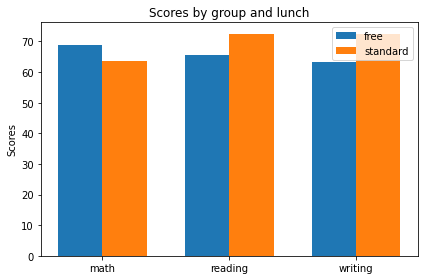

In [36]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['math', 'reading', 'writing']
free_means = [58.9, 64.7, 63.0]
standard_means = [70.0, 71.7, 70.8]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='free')
rects2 = ax.bar(x + width/2, women_means, width, label='standard')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and lunch')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [37]:
score_df.groupby("pre")[list(score_df.columns[-3:])[0]].mean()

pre
completed    69.695531
none         64.077882
Name: math, dtype: float64

In [38]:
score_df.groupby("pre")[list(score_df.columns[-3:])[1]].mean()

pre
completed    73.893855
none         66.534268
Name: reading, dtype: float64

In [39]:
score_df.groupby("pre")[list(score_df.columns[-3:])[2]].mean()

pre
completed    74.418994
none         64.504673
Name: writing, dtype: float64

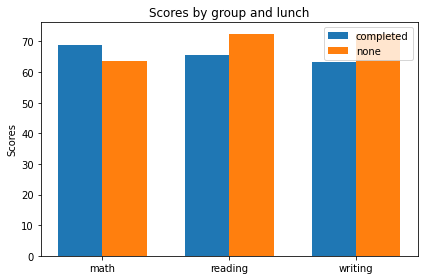

In [40]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['math', 'reading', 'writing']
completed_means = [69.7, 73.9, 74.4]
none_means = [64.1, 66.5, 64.5]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='completed')
rects2 = ax.bar(x + width/2, women_means, width, label='none')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and lunch')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()